In [13]:
# Run this for Google CoLab (use TensorFlow 1.x)
%tensorflow_version 1.x
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [14]:
!git clone https://github.com/NVlabs/stylegan2-ada.git

fatal: destination path 'stylegan2-ada' already exists and is not an empty directory.


In [15]:
!ls /content/stylegan2-ada/

calc_metrics.py  Dockerfile   LICENSE.txt   README.md	     train.py
dataset_tool.py  docs	      metrics	    style_mixing.py
dnnlib		 generate.py  projector.py  training


In [16]:
!python /content/stylegan2-ada/generate.py \
    --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl \
  --outdir=/content/results --seeds=6600-6625 


Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl"...
Setting up TensorFlow plugin "fused_bias_act.cu": Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Loading... Done.
Generating image for seed 6600 (0/26) ...
Generating image for seed 6601 (1/26) ...
Generating image for seed 6602 (2/26) ...
Generating image for seed 6603 (3/26) ...
Generating image for seed 6604 (4/26) ...
Generating image for seed 6605 (5/26) ...
Generating image for seed 6606 (6/26) ...
Generating image for seed 6607 (7/26) ...
Generating image for seed 6608 (8/26) ...
Generating image for seed 6609 (9/26) ...
Generating image for seed 6610 (10/26) ...
Generating image for seed 6611 (11/26) ...
Generating image for seed 6612 (12/26) ...
Generating image for seed 6613 (13/26) ...
Generating image for seed 6614 (14/26) ...
Generating image for seed 6615 (15/26) ...
Generating image for seed 6616 (16/26) ...
Generating image for seed 6617 (17/26) ...
Generating i

In [17]:
!ls /content/results/

seed6600.png  seed6606.png  seed6612.png  seed6618.png	seed6624.png
seed6601.png  seed6607.png  seed6613.png  seed6619.png	seed6625.png
seed6602.png  seed6608.png  seed6614.png  seed6620.png
seed6603.png  seed6609.png  seed6615.png  seed6621.png
seed6604.png  seed6610.png  seed6616.png  seed6622.png
seed6605.png  seed6611.png  seed6617.png  seed6623.png


In [18]:
cp /content/results/* \
    /content/drive/MyDrive/projects/stylegan2

cp: target '/content/drive/MyDrive/projects/stylegan2' is not a directory


In [8]:
ls

drive/  results/  sample_data/  stylegan2-ada/


In [19]:
import sys
import pickle
import os
import numpy as np
import PIL.Image
from IPython.display import Image
import matplotlib.pyplot as plt

sys.path.insert(0, "/content/stylegan2-ada")

import dnnlib
import dnnlib.tflib as tflib

def seed2vec(Gs, seed):
  rnd = np.random.RandomState(seed)
  return rnd.randn(1, *Gs.input_shape[1:])

def init_random_state(Gs, seed):
  rnd = np.random.RandomState(seed) 
  noise_vars = [var for name, var in Gs.components.synthesis.vars.items() if name.startswith('noise')]
  tflib.set_vars({var: rnd.randn(*var.shape.as_list()) for var in noise_vars}) # [height, width]

def display_image(image):
  plt.axis('off')
  plt.imshow(image)
  plt.show()

def generate_image(Gs, z, truncation_psi):
    # Render images for dlatents initialized from random seeds.
    Gs_kwargs = {
        'output_transform': dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True),
        'randomize_noise': False
    }
    if truncation_psi is not None:
        Gs_kwargs['truncation_psi'] = truncation_psi

    label = np.zeros([1] + Gs.input_shapes[1][1:])
    images = Gs.run(z, label, **Gs_kwargs) # [minibatch, height, width, channel]
    return images[0]

In [87]:
import IPython.display

URL="https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl"
#URL="https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ"
#URL = "https://github.com/jeffheaton/pretrained-gan-fish/releases/download/1.0.0/fish-gan-2020-12-09.pkl"
#URL = "https://github.com/jeffheaton/pretrained-merry-gan-mas/releases/download/v1/christmas-gan-2020-12-03.pkl"
#URL = "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl"
tflib.init_tf()
print('Loading networks from "%s"...' % URL)
with dnnlib.util.open_url(URL) as fp:
    _G, _D, Gs = pickle.load(fp)

Loading networks from "https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada/pretrained/ffhq.pkl"...


rm: cannot remove '/content/results/results': Is a directory
Seed 1


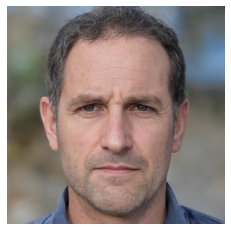

Seed 2


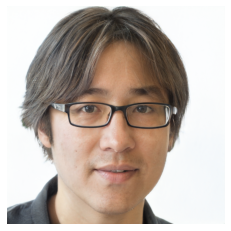

Seed 3


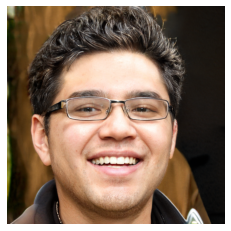

Seed 4


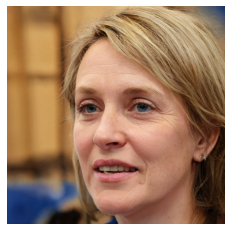

Seed 5


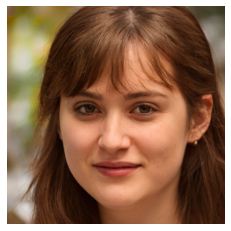

Seed 6


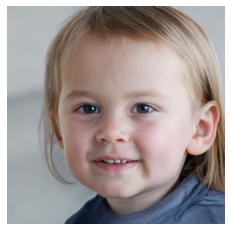

Seed 7


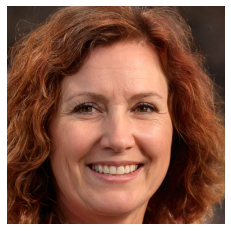

Seed 8


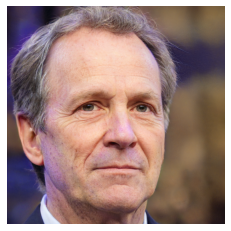

Seed 9


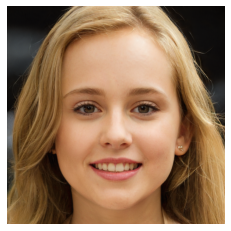

In [103]:
from google.colab import files

# Choose your own starting and ending seed.
SEED_FROM = 1
SEED_TO = 10

# Generate the images for the seeds.
for i in range(SEED_FROM, SEED_TO):
  print(f"Seed {i}")
  init_random_state(Gs, 10)
  z = seed2vec(Gs, i)
  img = generate_image(Gs, z, 0.7)
  display_image(img)
  #save_img(i)
  

  